In [ ]:
# Dựa trên các điểm thi đánh giá năng lực, hãy dự đoán xem sinh viên có định hướng nghề nghiệp hay chưa được định 
# hướng nghề nghiệp
# Input -> model -> Output

Input(feature): NN,LG,UX
Output(target): ĐH (có 2 giá trị: Y/N)
=> Đây là bài toán phân lớp (Classification): giải thuật Logistic 
    
=> Rơi vào kỹ thuật học: Supervised 

Features -> Model (Logistic) -> Target

In [1]:
#Import Thu Vien
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
#Tai Du Lieu Len Data Frame, dat ten la df
df = pd.read_csv('dulieuxettuyendaihoc.csv',header = 0, delimiter = ',', encoding = 'utf-8')

df=df[['NGONNGU','TOANLOGICPHANTICH','GIAIQUYETVANDE','DINHHUONGNGHENGHIEP']]

df.rename(columns={'NGONNGU':'NN','TOANLOGICPHANTICH':'LG','GIAIQUYETVANDE':'UX','DINHHUONGNGHENGHIEP':'DH'},
          inplace=True)

df.head(10)

,NN,LG,UX,DH
0,3.25,3.25,4.50,No
1,6.00,4.00,3.50,Yes
2,5.00,6.75,4.00,No
3,4.25,4.25,5.25,No
4,4.25,4.50,5.00,No
5,1.50,4.00,6.00,No
6,6.50,6.75,5.25,Yes
7,3.75,4.50,4.25,Yes
8,3.50,3.50,6.75,Yes
9,4.00,4.75,5.50,Yes


In [4]:
dinhhuong=pd.get_dummies(df['DH'])
dinhhuong

,No,Yes
0,True,False
1,False,True
2,True,False
3,True,False
4,True,False
...,...,...
95,False,True
96,True,False
97,False,True
98,True,False


In [5]:
dinhhuong.drop('No',axis=1,inplace=True)
dinhhuong

,Yes
0,False
1,True
2,False
3,False
4,False
...,...
95,True
96,False
97,True
98,False


In [6]:
#Gan vao DataFrame Ban Dau
df = pd.concat([df,dinhhuong],axis=1)
df.head(10)

,NN,LG,UX,DH,Yes
0,3.25,3.25,4.50,No,False
1,6.00,4.00,3.50,Yes,True
2,5.00,6.75,4.00,No,False
3,4.25,4.25,5.25,No,False
4,4.25,4.50,5.00,No,False
5,1.50,4.00,6.00,No,False
6,6.50,6.75,5.25,Yes,True
7,3.75,4.50,4.25,Yes,True
8,3.50,3.50,6.75,Yes,True
9,4.00,4.75,5.50,Yes,True


In [7]:
df.drop('DH',axis=1,inplace=True)
df.head(10)
#False = 0 , True = 1

,NN,LG,UX,Yes
0,3.25,3.25,4.50,False
1,6.00,4.00,3.50,True
2,5.00,6.75,4.00,False
3,4.25,4.25,5.25,False
4,4.25,4.50,5.00,False
5,1.50,4.00,6.00,False
6,6.50,6.75,5.25,True
7,3.75,4.50,4.25,True
8,3.50,3.50,6.75,True
9,4.00,4.75,5.50,True


In [8]:
#Tập dữ liệu Input(đặc trưng) và Output(mục tiêu)
X = df[['NN','LG','UX']].values #input (Feature)
y = df[['Yes']].values #output (Target)

In [9]:
#Chia tách ra trainning ( huấn luyện ) và testing (kiểm thử)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=16 )

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train.flatten())


LogisticRegression()

In [13]:
model.coef_

array([[ 0.31978112, -0.04309514,  0.02891314]])

In [15]:
model.intercept_

array([-1.29714816])

In [ ]:
Z(Định hướng) = -1.29714816 + 0.31978112 * NN  + (- 0.04309514) * LG + 0.02891314 * UX
|
|    f(z) = 1 / ( 1 + e ^ -2 ) : Hàm Sigmoid ( e: cơ số tự nhiên )
V 
Z' thuộc [0,1]
|
|     Threshold (ngưỡng) = 0.5 (ngưỡng mặc định 0.5) 
V
Nếu: + nhỏ hơn ngưỡng : 0
     + lớn hơn ngưỡng : 1   

In [ ]:
#Với điểm NN là 3.75, LG: 4.5, UX: 4.25
#Thí sinh viên có định hướng nghề nghiệp hay không
#Đáp án: Yes = ?
z = -1.29714816 + 0.31978112 * 3.75  + (- 0.04309514) * 4.5 + 0.02891314 * 4.25

In [ ]:
Z(Định hướng) = -1.29714816 + 0.31978112 * 3.75  + (- 0.04309514) * 4.5 + 0.02891314 * 4.25 = -0.169
|
|    f(z) = 1 / ( 1 + e ^ (-Z) ) : Hàm Sigmoid ( e: cơ số tự nhiên )
V 
Z' thuộc [0,1] = 0.45784623975
|
|     Threshold (ngưỡng) = 0.5 (ngưỡng mặc định 0.5) 
V
vì Z' < 0.5 nên thí sinh đó chưa được định hướng
=> Yes = 0 

In [ ]:
NN = 4.75
LG = 2.0
UX = 5.5 
z = -1.29714816 + 0.31978112 * 4.75  + (- 0.04309514) * 2 + 0.02891314 * 5.5 = 0.29464415
Z(Định hướng) = -1.29714816 + 0.31978112 * 4.75  + (- 0.04309514) * 2 + 0.02891314 * 5.5 = 0.29464415
|
|    f(z) = 1 / ( 1 + e ^ (-Z) ) : Hàm Sigmoid ( e: cơ số tự nhiên )
V 
Z' thuộc [0,1] = 0.57313271567
|
|     Threshold (ngưỡng) = 0.5 (ngưỡng mặc định 0.5) 
V
vì Z' > 0.5 nên thí sinh đó được định hướng
=> Yes = 1

In [16]:
X_test

array([[3.75, 4.5 , 4.25],
       [4.75, 2.  , 5.5 ],
       [3.5 , 4.75, 3.5 ],
       [5.75, 3.5 , 4.25],
       [4.75, 6.5 , 8.  ],
       [2.75, 3.75, 5.  ],
       [2.25, 3.5 , 5.  ],
       [3.75, 4.  , 3.5 ],
       [2.  , 5.25, 3.5 ],
       [4.  , 4.75, 5.5 ],
       [5.  , 4.  , 6.75],
       [2.5 , 3.5 , 6.5 ],
       [5.25, 4.5 , 4.75],
       [4.25, 2.75, 3.25],
       [5.  , 3.5 , 5.5 ],
       [1.5 , 4.5 , 5.5 ],
       [4.75, 4.75, 4.5 ],
       [6.5 , 4.5 , 8.  ],
       [2.25, 4.  , 4.25],
       [2.5 , 2.75, 5.5 ]])

In [17]:
#Default threshold is 0.5
y_pred_test = model.predict(X_test)
y_pred_test

#True = 1, False = 0

array([False,  True, False,  True,  True, False, False, False, False,
       False,  True, False,  True,  True,  True, False,  True,  True,
       False, False])

In [18]:
print(model.predict_proba(X_test))

# 0.54215376: Xác suất dự báo cho No
# hay nói cách khác là giá trị mô hình sau khi đi qua hàm 1 / ( 1 + e ^ (-Z) )
# với Target No = 1 : là không có định hướng 


# 0.45784624: Xác suất dự báo cho Yes
# hay nói cách khác là giá trị mô hình sau khi đi qua hàm 1 / ( 1 + e ^ (-Z) )
# với Target Yes = 0 là chưa được định hướng 

# [No       ,Yes       ] 

[[0.54215376 0.45784624]
 [0.42686728 0.57313272]
 [0.56989436 0.43010564]
 [0.37434035 0.62565965]
 [0.45685782 0.54314218]
 [0.60701717 0.39298283]
 [0.64196612 0.35803388]
 [0.54218784 0.45781216]
 [0.68624869 0.31375131]
 [0.51592045 0.48407955]
 [0.41956957 0.58043043]
 [0.61315482 0.38684518]
 [0.41943042 0.58056958]
 [0.49065667 0.50934333]
 [0.42312774 0.57687226]
 [0.70106665 0.29893335]
 [0.46326149 0.53673851]
 [0.30601715 0.69398285]
 [0.65184076 0.34815924]
 [0.6123461  0.3876539 ]]


In [20]:
#Changing Chreshold and Perdicting 
print('prediction with threshold 0.65: ')
y_pred_test_new_threshold = (model.predict_proba(X_test)[:,1] >= 0.65).astype(int)
y_pred_test_new_threshold

#Note: Giá trị Threshold càng cao và khắt khe thì số 0 càng nhiều và ngược lại số 1 càng nhiều

prediction with threshold 0.65: 


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [23]:
#Default threshold = 0.5 
result = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_test})
result
#So Truong Hop Dung = 7 voi ti le la 7/20 = 35% (Accuracy: Độ chính xác)

,Actual,Predicted
0,True,False
1,False,True
2,True,False
3,True,True
4,False,True
5,False,False
6,False,False
7,True,False
8,False,False
9,True,False


In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_test)

0.35

# SELF-STUDY

In [ ]:
TP (Actual = 1 , Predicted = 1) = 2
FP (Actual = 0 , Predicted = 1) = 7
FN (Act = 1    , Pred = 0     ) = 6
TN (Act = 0    , Pre = 0      ) = 5
=> TP va TN Cho biết số lượng case trường hợp dự báo đúng

Accuracy = TP + TN / (TP + TN + FP + FN)


       Actual
    ---------->
P      0    1
R  |0 TN | FP 
E  |  -   - 
D  |1 FN | TP 

Confusion Matrix 

In [26]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred_test)
cf_matrix 

# Giá trị
# TP (Actual = 1, Predicted = 1) = 2
# FP (Actual = 0, Predicted = 1) = 7
# FN (Actual = 1, Predicted = 0) = 6
# TN (Actual = 0, Predicted = 0) = 5

array([[5, 7],
       [6, 2]])

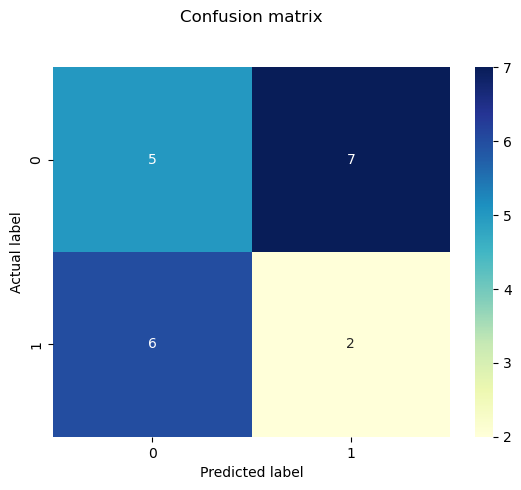

In [27]:
sns.heatmap(pd.DataFrame(cf_matrix),annot=True,cmap='YlGnBu',fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Các độ đo đánh giá mô hình phân lớp
# N la số lượng mẫu = TP+FP+FN+TN
# TP, FP, FN, WN
# accuracy = (TP+TN)/ (TP+FP+FN+TN)
# Precision = TP/(TP+FP)
# Recall = TP/(TP+EN)
# F1-Score = 2"Precision*Recall/(Precision+Recall)

In [28]:
from sklearn.metrics import classification_report
target_names = ['Không định hướng','Định hướng']
print(classification_report(y_test,y_pred_test,target_names=target_names))

                  precision    recall  f1-score   support

Không định hướng       0.45      0.42      0.43        12
      Định hướng       0.22      0.25      0.24         8

        accuracy                           0.35        20
       macro avg       0.34      0.33      0.34        20
    weighted avg       0.36      0.35      0.35        20



In [ ]:
# Đồ thị AUC & ROC Curve 


In [29]:
#Lưu trữ mô hình phân loại xuống thiết bị lưu trữ với tên Model_logistic_regression.sav
import pickle
pickle.dump(model,open('model_logistic_regression.sav','wb'))

In [34]:
#Sinh viên có định hướng hay không
import pickle 
#Load model from storage
loaded_model=pickle.load(open('model_logistic_regression.sav','rb'))

vNN = float(input('Điểm Ngôn Ngữ: '))
vLG = float(input('Điểm Logic: '))
vUX = float(input('Điểm Ứng Xử: '))

y_pred = loaded_model.predict([[vNN,vLG,vUX]])
print('Dự báo định hướng: '+str(y_pred[0]))

Điểm Ngôn Ngữ: 6.5
Điểm Logic: 4.5
Điểm Ứng Xử: 8
Dự báo định hướng: True
